<a href="https://colab.research.google.com/github/Sriharshitha842/DWDM_LAB/blob/main/DWDM_lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME OF THE STUDENT : SRIHARSHITHA DEEPALA**

**REGISTRATION NUMBER : 19BCD7246**

**COURSE CODE : CSE4005**

**SLOT : L31 + L32 + L15 + L16 + L23 + L24**

**LAB NUMBER : 11**

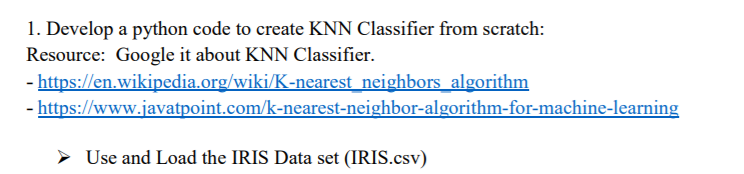

In [28]:
import pandas as pd
import numpy as np
import math
import operator
from sklearn import datasets
#loading dataset and analysis
col=['sepal_length','sepal_width','petal_length','petal_width','type']
iris = pd.read_csv("/content/sample_data/iris.xlsx",names=col)
print("First five rows")
print(iris.head())
print("*********")
print("columns",iris.columns)
print("*********")
print("shape:",iris.shape)
print("*********")
print("Size:",iris.size)
print("*********")
print("no of samples available for each type")
print(iris['type'].value_counts())
print("*********")
print(iris.describe())

First five rows
   sepal_length  sepal_width  petal_length  petal_width         type
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
*********
columns Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type'], dtype='object')
*********
shape: (150, 5)
*********
Size: 750
*********
no of samples available for each type
Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: type, dtype: int64
*********
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000    

image.png

In [29]:
iris = iris.drop(iris.columns[[4]], axis =1)
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result
a=normalize(iris)
print(a)

     sepal_length  sepal_width  petal_length  petal_width
0        0.222222     0.625000      0.067797     0.041667
1        0.166667     0.416667      0.067797     0.041667
2        0.111111     0.500000      0.050847     0.041667
3        0.083333     0.458333      0.084746     0.041667
4        0.194444     0.666667      0.067797     0.041667
..            ...          ...           ...          ...
145      0.666667     0.416667      0.711864     0.916667
146      0.555556     0.208333      0.677966     0.750000
147      0.611111     0.416667      0.711864     0.791667
148      0.527778     0.583333      0.745763     0.916667
149      0.444444     0.416667      0.694915     0.708333

[150 rows x 4 columns]


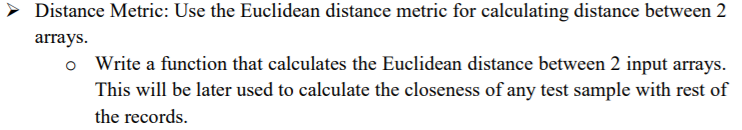

In [30]:
def euclidianDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
       
    return np.sqrt(distance)

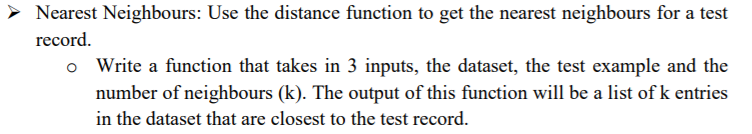

In [31]:
def knn(trainingSet, testInstance, k):
 
    distances = {}
    sort = {}
    length = testInstance.shape[1]
    print(length)
    
    
    # Calculating euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):
        
       
        dist = euclidianDistance(testInstance, trainingSet.iloc[x], length)
        distances[x] = dist[0]
       
 
    
    # Sorting them on the basis of distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1)) #by using it we store indices also
    sorted_d1 = sorted(distances.items())
    print(sorted_d[:5])
    print(sorted_d1[:5])
   
 
    neighbors = []
    
    
    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])
        counts = {"Iris-setosa":0,"Iris-versicolor":0,"Iris-virginica":0}
    
    
    # Calculating the most freq class in the neighbors
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]][-1]
 
        if response in counts:
            counts[response] += 1
        else:
            counts[response] = 1
  
    print(counts)
    sortedVotes = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
    print(sortedVotes)
    return(sortedVotes[0][0], neighbors)

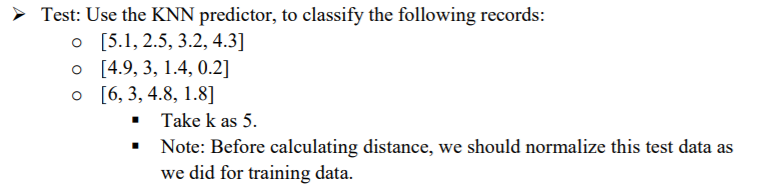

In [32]:
testSet = [[5.1, 2.5, 3.2, 4.3]]
test = pd.DataFrame(testSet)
result,neigh = knn(a, test, 5)#here we gave k=5
print("And the flower is:",result)
print("the neighbors are:",neigh)

4
[(117, 6.087041039188838), (131, 6.115632917205512), (109, 6.176435856416245), (135, 6.205711876040031), (118, 6.214345212470344)]
[(0, 7.433198631977099), (1, 7.524769525281093), (2, 7.545831753928149), (3, 7.561319922007114), (4, 7.441081055384129)]
{'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 0, 0.8750000000000001: 1, 0.7916666666666666: 1, 1.0: 1, 0.9166666666666666: 2}
[(0.9166666666666666, 2), (0.8750000000000001, 1), (0.7916666666666666, 1), (1.0, 1), ('Iris-setosa', 0), ('Iris-versicolor', 0), ('Iris-virginica', 0)]
And the flower is: 0.9166666666666666
the neighbors are: [117, 131, 109, 135, 118]


In [33]:
testSet = [[4.9, 3, 1.4, 0.2]]
test = pd.DataFrame(testSet)
result,neigh = knn(a, test, 5)#here we gave k=5
print("And the flower is:",result)
print("the neighbors are:",neigh)

4
[(131, 4.567006448310704), (117, 4.620910353192522), (135, 4.808378320492443), (109, 4.809966720338043), (105, 4.810917801908021)]
[(0, 5.414985249711392), (1, 5.556787819583891), (2, 5.570344586931683), (3, 5.604936250785647), (4, 5.420934683906876)]
{'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 0, 0.7916666666666666: 1, 0.8750000000000001: 1, 0.9166666666666666: 1, 1.0: 1, 0.8333333333333334: 1}
[(0.7916666666666666, 1), (0.8750000000000001, 1), (0.9166666666666666, 1), (1.0, 1), (0.8333333333333334, 1), ('Iris-setosa', 0), ('Iris-versicolor', 0), ('Iris-virginica', 0)]
And the flower is: 0.7916666666666666
the neighbors are: [131, 117, 135, 109, 105]


In [34]:
testSet = [[6, 3, 4.8, 1.8]]
test = pd.DataFrame(testSet)
result,neigh = knn(a, test, 5)#here we gave k=5
print("And the flower is:",result)
print("the neighbors are:",neigh)

4
[(131, 6.794886735775578), (117, 6.795258875792763), (105, 6.948191093748544), (118, 6.952799418441928), (122, 6.95595179765232)]
[(0, 8.031738671247789), (1, 8.13553156976994), (2, 8.159362617724312), (3, 8.17266006403446), (4, 8.039552524047647)]
{'Iris-setosa': 0, 'Iris-versicolor': 0, 'Iris-virginica': 0, 0.7916666666666666: 2, 0.8750000000000001: 1, 0.8333333333333334: 1, 0.9166666666666666: 1}
[(0.7916666666666666, 2), (0.8750000000000001, 1), (0.8333333333333334, 1), (0.9166666666666666, 1), ('Iris-setosa', 0), ('Iris-versicolor', 0), ('Iris-virginica', 0)]
And the flower is: 0.7916666666666666
the neighbors are: [131, 117, 105, 118, 122]


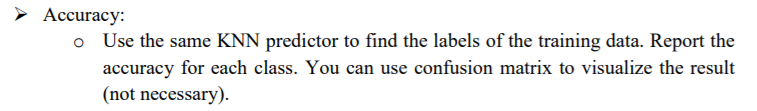

The accuracy for optimal k = 13 using brute is 93.33333333333333


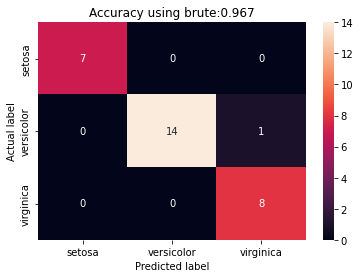

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score , precision_score , roc_auc_score ,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
iris = pd.read_csv("/content/sample_data/iris.xlsx")
x=iris.iloc[1:,:3]
y=iris.iloc[1:,4:]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#train=80% and test=20% data is randomly split

cv_scores = []
neighbors = list(np.arange(3,50,2))
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n,algorithm = 'brute')
    
    cross_val = cross_val_score(knn,x_train,y_train,cv = 5 , scoring = 'accuracy')
    cv_scores.append(cross_val.mean())
    
error = [1-x for x in cv_scores]
optimal_n = neighbors[ error.index(min(error)) ]
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n,algorithm = 'brute')
knn_optimal.fit(x_train,y_train)
pred = knn_optimal.predict(x_test)
acc = accuracy_score(y_test,pred)*100
print("The accuracy for optimal k = {0} using brute is {1}".format(optimal_n,acc))

clf = SVC(kernel = 'linear').fit(x_train,y_train)
clf.predict(x_train)
y_pred = clf.predict(x_test)
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using brute:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

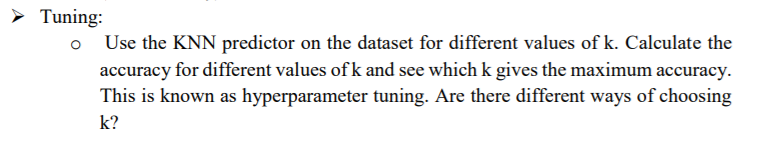

In [43]:
from sklearn import metrics
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9, 0.9333333333333333, 0.9, 0.9333333333333333, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.8666666666666667, 0.9]


Text(0, 0.5, 'Testing Accuracy')

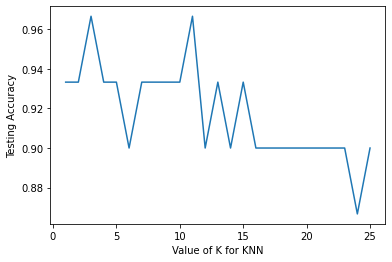

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')